In [54]:
import pandas as pd
import numpy as np
import random
import sklearn
from sklearn.model_selection import *
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
#Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro as shp
from scipy.stats import pearsonr
from numpy import cov
import keras
from keras.layers import Activation, Dense, Dropout, Flatten,MaxPooling1D
from keras.models import Sequential
#from keras.layers import GaussianNoise
from keras import optimizers
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as st
import datetime
import tensorflow as tf
import math

from scipy.stats import zscore
from numpy import power
from numpy import sqrt
from numpy import mean
from numpy import std
from numpy import sum 
from sklearn.linear_model import LinearRegression

In [448]:
data = pd.read_csv("emission.csv")

In [456]:
data.loc[(data['Year']==2017)&(data['Country']=='China')]

,Country,Crop,Year,Area harvested,Production quantity,Yield,Annual Population,Total emission
11573,China,Barley,2017,477723.0,1897318.0,39716.0,1452625.244,135.3975
11630,China,"Beans, dry",2017,759683.0,1333855.0,17558.0,1452625.244,76.6200
11687,China,Maize,2017,42429378.0,259256299.0,61103.0,1452625.244,15920.7546
11744,China,Millet,2017,813406.0,1997272.0,24554.0,1452625.244,135.6799
11801,China,Oats,2017,366414.0,1281016.0,34961.0,1452625.244,79.7015
11858,China,Potatoes,2017,4862361.0,88536429.0,182085.0,1452625.244,1328.4097
11915,China,"Rice, paddy",2017,31021677.0,214430049.0,69123.0,1452625.244,14785.4281
11972,China,Rye,2017,351409.0,1332257.0,37912.0,1452625.244,83.5919
12029,China,Sorghum,2017,623954.0,2797235.0,44831.0,1452625.244,155.8482
12086,China,Soybeans,2017,7352883.0,13133634.0,17862.0,1452625.244,1199.8376


In [447]:
data.loc[(data['Country']=='China')&(data['Crop']=='Wheat')&(data['Year']=='2017')]

,Country,Crop,Year,Area harvested,Production quantity,Yield,Annual Population,Total emission


In [56]:
i = data[(data['Area harvested'] == 0) |(data['Production quantity'] == 0)].index
data=data.drop(i)

In [ ]:
#data.isnull().sum()

In [6]:
data.head(2)

,Country,Crop,Year,Area harvested,Production quantity,Yield,Annual Population,Total emission
0,Afghanistan,Barley,1961,350000.0,378000.0,10800.0,9169.410,35.3617
1,Afghanistan,Barley,1962,350000.0,378000.0,10800.0,9351.441,35.3617


# Experiment 1: Dropping AH

# Experiment 1a

In [57]:
data.drop(['Area harvested','Production quantity'],inplace=True,axis=1)
data.head()

,Country,Crop,Year,Yield,Annual Population,Total emission
0,Afghanistan,Barley,1961,10800.0,9169.410,35.3617
1,Afghanistan,Barley,1962,10800.0,9351.441,35.3617
2,Afghanistan,Barley,1963,10800.0,9543.205,35.3617
3,Afghanistan,Barley,1964,10857.0,9744.781,35.4883
4,Afghanistan,Barley,1965,10857.0,9956.320,35.4883


In [58]:
area_en = preprocessing.LabelEncoder()
area_en.fit(data["Country"])
area = area_en.transform(data["Country"])
data["Country"] = area

item_en = preprocessing.LabelEncoder()
item_en.fit(data["Crop"])
items = item_en.transform(data["Crop"])
data["Crop"] = items

#data["Production quantity"] = np.log10(data["Production quantity"])
data["Yield"] = np.log10(data["Yield"])
data["Annual Population"] = np.log10(data["Annual Population"])
data["Total emission"] = np.log10(data["Total emission"])

In [59]:
print (shp(data["Yield"]))
print (shp(data["Annual Population"]))
print (shp(data["Total emission"]))


(0.9434827566146851, 0.0)
(0.9825036525726318, 0.0)
(0.9952389597892761, 2.5260983208629185e-39)


In [60]:
data['Total emission'].isna().sum()

0

In [22]:
area_en.classes_

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Taiwan Province of',
       'China, mainland', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Eritrea', 'Estonia', 'Eswatini',

In [24]:
#area_en.inverse_transform(data["Country"])

array(['Afghanistan', 'Afghanistan', 'Afghanistan', ..., 'Zimbabwe',
       'Zimbabwe', 'Zimbabwe'], dtype=object)

In [61]:
#np.random.shuffle(data)
X = np.array(data.iloc[:,:5])
y = np.array(data.iloc[:,5])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=500)

# MLP starts

In [10]:
regr = MLPRegressor(hidden_layer_sizes=(120,64,38,6 ), activation='relu', solver='adam', alpha=0.01, 
                    batch_size='auto',verbose=False,
                    max_iter=100, shuffle=True, random_state=50)
regr.fit(X_train, y_train)


MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(120, 64, 38, 6), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=100,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=50, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
#MLP_1a_test = regr.predict(X_test)

In [ ]:
# print(MLP_1a_test[0])
# print(y_test[0])

In [11]:
print("Experiment 1a_MLP")
print("Test metrics")
MLP_1a_test = regr.predict(X_test)

print("Test MAE:", round(mean_absolute_error(y_test, MLP_1a_test),3))
print("Test R2", round(r2_score(y_test, MLP_1a_test),3))
print("Test MSE:", round(mean_squared_error(y_test, MLP_1a_test, squared= False),3))
print("Test RMSE:",round(mean_squared_error(y_test, MLP_1a_test, squared= True),3))

print("Train metrics")
MLP_1a_train = regr.predict(X_train)

print("Train MAE:", round(mean_absolute_error(y_train, MLP_1a_train),3))
print("Train R2", round(r2_score(y_train, MLP_1a_train),3))
print("Train MSE:", round(mean_squared_error(y_train, MLP_1a_train, squared= False),3))
print("Train RMSE:",round(mean_squared_error(y_train, MLP_1a_train, squared= True),3))

Experiment 1a_MLP
Test metrics
Test MAE: 0.898
Test R2 0.33
Test MSE: 1.124
Test RMSE: 1.264
Train metrics
Train MAE: 0.895
Train R2 0.332
Train MSE: 1.118
Train RMSE: 1.249


In [12]:
print("MLP Experiment 1a_test statistics")
print("The mean of the actual labels:",round(np.mean(y_test),3))
print("The mean of the predicted labels:",round(np.mean(MLP_1a_test),3))
print("The sd of the actual labels:",round(np.std(y_test),3))
print("The sd of the predicted labels:",round(np.std(MLP_1a_test),3))
      
print("MLP Experiment 1a_train statistics")
print("The mean of the actual labels:",round(np.mean(y_train),3))
print("The mean of the predicted labels:",round(np.mean(MLP_1a_train),3))
print("The sd of the actual labels:",round(np.std(y_train),3))
print("The sd of the predicted labels:",round(np.std(MLP_1a_train),3))

MLP Experiment 1a_test statistics
The mean of the actual labels: 0.61
The mean of the predicted labels: 0.634
The sd of the actual labels: 1.373
The sd of the predicted labels: 0.716
MLP Experiment 1a_train statistics
The mean of the actual labels: 0.617
The mean of the predicted labels: 0.635
The sd of the actual labels: 1.367
The sd of the predicted labels: 0.718


In [38]:
X_test.shape[0]
y_test.shape[0]

19962

In [25]:
# # estimate stdev of yhat
# sum_errs = sum((y_test - MLP_1a_test)**2)
# stdev = sqrt(1/(len(y_test)-2) * sum_errs)
# print(sum_errs)
# print(stdev)
# 3
# calculate prediction interval
interval = 1.96 * stdev
lower, upper = MLP_1a_test - interval, MLP_1a_test + interval
print('95%% likelihood that the true value is between %.3f and %.3f' % (lower, upper))
print('True value: %.3f' % y_out)
# # plot dataset and prediction with interval
# pyplot.scatter(x, y)
# pyplot.plot(x, yhat, color='red')
# pyplot.errorbar(x_in, yhat_out, yerr=interval, color='black', fmt='o')
# pyplot.show()

TypeError: only size-1 arrays can be converted to Python scalars

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
# Set lower and upper quantile
LOWER_ALPHA = 0.1
UPPER_ALPHA = 0.9
# Each model has to be separate
lower_model = GradientBoostingRegressor(loss="quantile",                   
                                        alpha=LOWER_ALPHA)
# The mid model will use the default loss
mid_model = GradientBoostingRegressor(loss="ls")
upper_model = GradientBoostingRegressor(loss="quantile",
                                        alpha=UPPER_ALPHA)

In [15]:
_ = lower_model.fit(X_train, y_train)
_ = mid_model.fit(X_train, y_train)
_ = upper_model.fit(X_train, y_train)

In [39]:
predictions['Actual'] = pd.DataFrame(y_test)
predictions['lower'] = lower_model.predict(X_test)
predictions['mid'] = mid_model.predict(X_test)
predictions['upper'] = upper_model.predict(X_test)

assert (predictions['upper'] > predictions['lower']).all()

predictions.tail()

,0,lower,mid,upper,Actual
19957,1.572463,-1.198139,0.172847,1.457500,1.572463
19958,1.718186,0.681425,2.013217,2.931761,1.718186
19959,2.641356,2.287348,2.269164,2.701695,2.641356
19960,1.183816,-0.670594,0.688150,1.772524,1.183816
19961,1.660516,-0.045998,1.730594,2.861608,1.660516


In [ ]:
print("Experiment 1a_MLP_test")
plt.scatter(X_test[:200,2],y_test[:200],marker='*',color='r',s=50)
plt.scatter(X_test[:200,2],MLP_1a_test[:200],color='g',s=50)
plt.title('MLP Regressor model Predicted vs Actual')
plt.ylabel('Predicted and Actual CO2 emission')
plt.xlabel('Year')
plt.legend(['Actual', 'Predicted'], loc='upper right')
# plt.show()
# plt.savefig('Ex:1_Model_MSE.jpg', bbox_inches='tight')

In [ ]:
print("Experiment 1a_MLP_test")
plt.scatter(y_test,MLP_1a_test,s=50,marker='*',color='skyblue')
m, b = np.polyfit(y_test, MLP_1a_test,1)
plt.plot(y_test, m*y_test + b)
plt.title('MLP regressor Model Predicted vs Actual emission')
plt.ylabel('Predicted emission')
plt.xlabel('Actual emission')
plt.text(-1.0,1.8, 'R-squared = %0.2f' % r2_score(y_test, MLP_1a_test))

In [ ]:
df=data.copy()
cols = list(df.columns)
cols.remove('Country')
cols.remove('Crop')
cols.remove('Year')
df[cols]
df[cols]=df[cols].apply(zscore)

In [ ]:
df.head(2)

In [ ]:
X1 = np.array(df.iloc[:,:5])
y1 = np.array(df.iloc[:,5])
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.30, random_state=300)

In [ ]:
regr = MLPRegressor(hidden_layer_sizes=(120,64,38,6 ), activation='relu', solver='adam', alpha=0.01, 
                    batch_size=300,verbose=False,
                    max_iter=100, shuffle=True, random_state=50)

regr.fit(X1_train, y1_train)


In [ ]:
print("MLP Results_1b")
print("Test metrics 1b_test")
MLP_1b_test = regr.predict(X1_test)

print("Test MAE:", round(mean_absolute_error(y1_test, MLP_1b_test),3))
print("Test R2", round(r2_score(y1_test, MLP_1b_test),3))
print("Test MSE:", round(mean_squared_error(y1_test, MLP_1b_test, squared= False),3))
print("Test RMSE:",round(mean_squared_error(y1_test, MLP_1b_test, squared= True),3))

print("Train metrics")
MLP_1b_train = regr.predict(X1_train)

print("Train MAE:", round(mean_absolute_error(y1_train, MLP_1b_train),3))
print("Train R2", round(r2_score(y1_train, MLP_1b_train),3))
print("Train MSE:", round(mean_squared_error(y1_train, MLP_1b_train, squared= False),3))
print("Train RMSE:",round(mean_squared_error(y1_train, MLP_1b_train, squared= True),3))

In [ ]:
print("MLP Experiment 1a_test statistics")
print("The mean of the actual labels:",round(np.mean(y1_test),3))
print("The mean of the predicted labels:",round(np.mean(MLP_1b_test),3))
print("The sd of the actual labels:",round(np.std(y1_test),3))
print("The sd of the predicted labels:",round(np.std(MLP_1b_test),3))
print()
print("MLP Experiment 1a_train statistics")
print("The mean of the actual labels:",round(np.mean(y1_train),3))
print("The mean of the predicted labels:",round(np.mean(MLP_1b_train),3))
print("The sd of the actual labels:",round(np.std(y1_train),3))
print("The sd of the predicted labels:",round(np.std(MLP_1b_train),3))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Set lower and upper quantile
LOWER_ALPHA = 0.1
UPPER_ALPHA = 0.9
# Each model has to be separate
lower_model = GradientBoostingRegressor(loss="quantile",                   
                                        alpha=LOWER_ALPHA)
# The mid model will use the default loss
mid_model = GradientBoostingRegressor(loss="ls")
upper_model = GradientBoostingRegressor(loss="quantile",
                                        alpha=UPPER_ALPHA)

In [ ]:
# Fit models
lower_model.fit(X1_train, y1_train)
mid_model.fit(X1_train, y1_train)
upper_model.fit(X1_train, y1_train)
# Record actual values on test set
predictions = pd.DataFrame(y1_test)
# Predict
predictions['lower'] = lower_model.predict(X1_test)
predictions['mid'] = mid_model.predict(X1_test)
predictions['upper'] = upper_model.predict(X1_test)

In [ ]:
predictions

In [ ]:
print("Experiment 1b_MLP_test")
plt.scatter(X1_test[:200,2],y1_test[:200],marker='*',color='r',s=50)
plt.scatter(X1_test[:200,2],MLP_1b_test[:200],color='g',s=50)
plt.title('MLP Regressor model Predicted vs Actual')
plt.ylabel('Predicted and Actual CO2 emission')
plt.xlabel('Year')
plt.legend(['Actual', 'Predicted'], loc='upper right')
# plt.show()
# plt.savefig('Ex:1_Model_MSE.jpg', bbox_inches='tight')

In [ ]:
print("Experiment 1b_MLP_test")
plt.scatter(y1_test,MLP_1b_test,s=50,marker='*',color='skyblue')
m, b = np.polyfit(y1_test, MLP_1b_test,1)
plt.plot(y1_test, m*y1_test + b)
plt.title('MLP regressor Model Predicted vs Actual emission')
plt.ylabel('Predicted emission')
plt.xlabel('Actual emission')
plt.text(-.0, 1.0, 'R-squared = %0.2f' % r2_score(y1_test, MLP_1b_test))

# RFR

In [ ]:

from sklearn import tree


In [ ]:
regr = RandomForestRegressor(max_depth=25, random_state=10,oob_score=True,n_estimators=200)
regr.fit(X_train, y_train)

In [ ]:
print(regr.oob_score_)

In [ ]:
print("Test RFR 1a metrics")
RFR_1a_test = regr.predict(X_test)

print("Test MAE:", round(mean_absolute_error(y_test, RFR_1a_test),2))
print("Test R2", round(r2_score(y_test, RFR_1a_test),4))
print("Test MSE:", round(mean_squared_error(y_test, RFR_1a_test, squared= False),2))
print("Test RMSE:",round(mean_squared_error(y_test, RFR_1a_test, squared= True),4))

print("Train metrics")
RFR_1a_train = regr.predict(X_train)

print("Train MAE:", round(mean_absolute_error(y_train, RFR_1a_train),2))
print("Train R2", round(r2_score(y_train, RFR_1a_train),4))
print("Train MSE:", round(mean_squared_error(y_train, RFR_1a_train, squared= False),2))
print("Train RMSE:",round(mean_squared_error(y_train, RFR_1a_train, squared= True),4))

In [ ]:
plt.scatter(X_test[:200,2],y_test[:200],marker='*',color='r',s=50)
plt.scatter(X_test[:200,2],RFR_1a_test[:200],color='g',s=30)
plt.title('RF Regressor model Predicted vs Actual')
plt.ylabel('Predicted and Actual CO2 emission')
plt.xlabel('Year')
plt.legend(['Actual', 'Predicted'], loc='upper right')
# plt.show()
# plt.savefig('Ex:1_Model_MSE.jpg', bbox_inches='tight')

In [ ]:
print("RFR Exp 1a")
plt.scatter(y_test,RFR_1a_test,s=50,marker='*',color='skyblue')
m, b = np.polyfit(y_test, RFR_1a_test,1)
plt.plot(y_test, m*y_test + b)
plt.title('RF regressor Model Predicted vs Actual emission')
plt.ylabel('Predicted emission')
plt.xlabel('Actual emission')
plt.text(-2.0, 2.0, 'R-squared = %0.3f' % r2_score(y_test, RFR_1a_test))

In [ ]:
df=data.copy()
cols = list(df.columns)
cols.remove('Country')
cols.remove('Crop')
cols.remove('Year')
df[cols]
df[cols]=df[cols].apply(zscore)

In [ ]:
df.head()

In [ ]:
X1 = np.array(df.iloc[:,:5])
y1 = np.array(df.iloc[:,5])
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.30, random_state=300)

In [ ]:
regr = RandomForestRegressor(max_depth=25, random_state=10,oob_score=True,n_estimators=200)

regr.fit(X1_train, y1_train)

In [ ]:
print("Test RFR 1b metrics")
RFR_1b_test = regr.predict(X1_test)

print("Test MAE:", round(mean_absolute_error(y1_test, RFR_1b_test),3))
print("Test R2", round(r2_score(y1_test, RFR_1b_test),3))
print("Test MSE:", round(mean_squared_error(y1_test, RFR_1b_test, squared= False),3))
print("Test RMSE:",round(mean_squared_error(y1_test, RFR_1b_test, squared= True),3))

print("Train metrics")
RFR_1b_train = regr.predict(X1_train)

print("Train MAE:", round(mean_absolute_error(y1_train, RFR_1b_train),3))
print("Train R2", round(r2_score(y1_train, RFR_1b_train),3))
print("Train MSE:", round(mean_squared_error(y1_train, RFR_1b_train, squared= False),3))
print("Train RMSE:",round(mean_squared_error(y1_train, RFR_1b_train, squared= True),3))

In [ ]:
plt.scatter(X1_test[:200,2],y1_test[:200],marker='*',color='r',s=50)
plt.scatter(X1_test[:200,2],RFR_1b_test[:200],color='g',s=30)
plt.title('RF Regressor model Predicted vs Actual')
plt.ylabel('Predicted and Actual CO2 emission')
plt.xlabel('Year')
plt.legend(['Actual', 'Predicted'], loc='upper right')
# plt.show()
# plt.savefig('Ex:1_Model_MSE.jpg', bbox_inches='tight')

In [ ]:
plt.scatter(y1_test,RFR_1b_test,s=50,marker='*',color='skyblue')
m, b = np.polyfit(y1_test, RFR_1b_test,1)
plt.plot(y1_test, m*y1_test + b)
plt.title('RF regressor Model Predicted vs Actual emission')
plt.ylabel('Predicted emission')
plt.xlabel('Actual emission')
plt.text(-2.0, 2.0, 'R-squared = %0.3f' % r2_score(y1_test, RFR_1b_test))

# RFR ENDS

# MLR start

In [12]:
data.head(2)

,Country,Crop,Year,Yield,Annual Population,Total emission
0,0,0,1961,4.033424,3.962341,1.548533
1,0,0,1962,4.033424,3.970879,1.548533


In [13]:
X = np.array(data.iloc[:,:5])
y = np.array(data.iloc[:,5])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=300)

In [62]:
reg = LinearRegression()
# reg = KNeighborsRegressor(n_neighbors=20)
# neigh.fit(X, y)
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
print("MLR 1a Test metrics")
MLR_1a_test = reg.predict(X_test)

print("Test MAE:", round(mean_absolute_error(y_test, MLR_1a_test),3))
print("Test R2", round(r2_score(y_test, MLR_1a_test),3))
print("Test MSE:", round(mean_squared_error(y_test, MLR_1a_test, squared= False),3))
print("Test RMSE:",round(mean_squared_error(y_test, MLR_1a_test, squared= True),3))

print("Train metrics")
MLR_1a_train = reg.predict(X_train)

print("Train MAE:", round(mean_absolute_error(y_train, MLR_1a_train),3))
print("Train R2", round(r2_score(y_train, MLR_1a_train),3))
print("Train MSE:", round(mean_squared_error(y_train, MLR_1a_train, squared= False),3))
print("Train RMSE:",round(mean_squared_error(y_train, MLR_1a_train, squared= True),3))

MLR 1a Test metrics
Test MAE: 0.897
Test R2 0.333
Test MSE: 1.121
Test RMSE: 1.258
Train metrics
Train MAE: 0.892
Train R2 0.336
Train MSE: 1.114
Train RMSE: 1.241


In [64]:
feature_cols = list(data.columns)
feature_cols.remove('Total emission')

In [65]:
print(reg.intercept_)
print(reg.coef_)
(feature_cols, reg.coef_)

7.860004924992314
[-7.77403312e-04 -1.74512224e-02 -5.61263532e-03  5.04787563e-03
  1.01340432e+00]


(['Country', 'Crop', 'Year', 'Yield', 'Annual Population'],
 array([-7.77403312e-04, -1.74512224e-02, -5.61263532e-03,  5.04787563e-03,
         1.01340432e+00]))

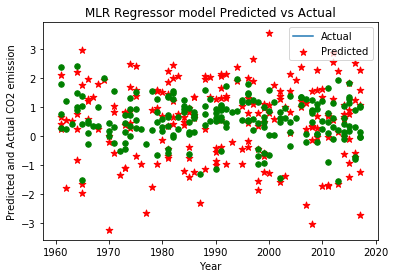

In [67]:
plt.scatter(X_test[:200,2],y_test[:200],marker='*',color='r',s=50)
plt.scatter(X_test[:200,2],MLR_1a_test[:200],color='g',s=30)
plt.plot(np.mean(X_test[:200,2]),np.mean(MLR_1a_test[:200]))
plt.title('MLR Regressor model Predicted vs Actual')
plt.ylabel('Predicted and Actual CO2 emission')
plt.xlabel('Year')
plt.legend(['Actual', 'Predicted'], loc='upper right')
# plt.show()
# plt.savefig('Ex:1_Model_MSE.jpg', bbox_inches='tight')

Text(-2.0, 2.0, 'R-squared = 0.333')

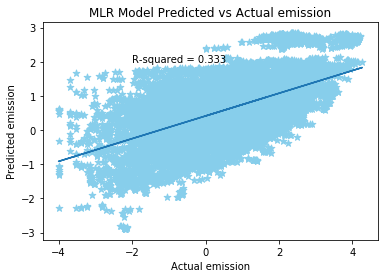

In [68]:
plt.scatter(y_test,MLR_1a_test,s=50,marker='*',color='skyblue')
m, b = np.polyfit(y_test, MLR_1a_test,1)
plt.plot(y_test, m*y_test + b)
plt.title('MLR Model Predicted vs Actual emission')
plt.ylabel('Predicted emission')
plt.xlabel('Actual emission')
plt.text(-2.0, 2.0, 'R-squared = %0.3f' % r2_score(y_test, MLR_1a_test))

# Feature standardization

In [69]:
df=data.copy()
cols = list(df.columns)
cols.remove('Country')
cols.remove('Crop')
cols.remove('Year')
df[cols]
df[cols]=df[cols].apply(zscore)

In [70]:
X1 = np.array(df.iloc[:,:5])
y1 = np.array(df.iloc[:,5])
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.30, random_state=300)

In [71]:
reg = LinearRegression()
reg.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
print("Test metrics for MLR")
MLR_1b_test = reg.predict(X1_test)

print("Test MAE:", round(mean_absolute_error(y1_test, MLR_1b_test),3))
print("Test R2", round(r2_score(y1_test, MLR_1b_test),3))
print("Test MSE:", round(mean_squared_error(y1_test, MLR_1b_test, squared= False),3))
print("Test RMSE:",round(mean_squared_error(y1_test, MLR_1b_test, squared= True),3))

print("Train metrics")
MLR_1b_train = reg.predict(X1_train)

print("Train MAE:", round(mean_absolute_error(y1_train, MLR_1b_train),3))
print("Train R2", round(r2_score(y1_train, MLR_1b_train),3))
print("Train MSE:", round(mean_squared_error(y1_train, MLR_1b_train, squared= False),3))
print("Train RMSE:",round(mean_squared_error(y1_train, MLR_1b_train, squared= True),3))

Test metrics for MLR
Test MAE: 0.653
Test R2 0.329
Test MSE: 0.819
Test RMSE: 0.671
Train metrics
Train MAE: 0.653
Train R2 0.338
Train MSE: 0.814
Train RMSE: 0.662


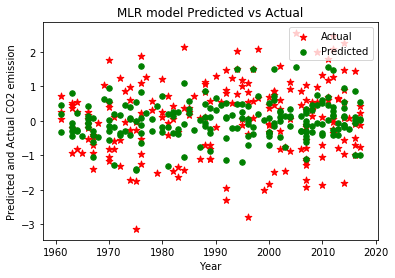

In [74]:
plt.scatter(X1_test[:200,2],y1_test[:200],marker='*',color='r',s=50)
plt.scatter(X1_test[:200,2],MLR_1b_test[:200],color='g',s=30)
plt.title('MLR model Predicted vs Actual')
plt.ylabel('Predicted and Actual CO2 emission')
plt.xlabel('Year')
plt.legend(['Actual', 'Predicted'], loc='upper right')
# plt.show()
# plt.savefig('Ex:1_Model_MSE.jpg', bbox_inches='tight')

Text(-1.0, 0.5, 'R-squared = 0.329')

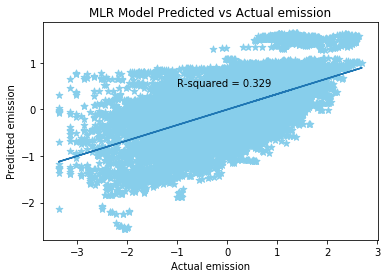

In [75]:
plt.scatter(y1_test,MLR_1b_test,s=50,marker='*',color='skyblue')
m, b = np.polyfit(y1_test, MLR_1b_test,1)
plt.plot(y1_test, m*y1_test + b)
plt.title('MLR Model Predicted vs Actual emission')
plt.ylabel('Predicted emission')
plt.xlabel('Actual emission')
plt.text(-1.0, .50, 'R-squared = %0.3f' % r2_score(y1_test, MLR_1b_test))

In [ ]:
class sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


In [442]:
df = pd.read_csv("emission.csv")

In [443]:
i = df[(df['Area harvested'] == 0) |(df['Production quantity'] == 0)].index
df=df.drop(i)

In [444]:
area_en = preprocessing.LabelEncoder()
area_en.fit(df["Country"])
area = area_en.transform(df["Country"])
df["Country"] = area

item_en = preprocessing.LabelEncoder()
item_en.fit(df["Crop"])
items = item_en.transform(df["Crop"])
df["Crop"] = items

#data["Production quantity"] = np.log10(data["Production quantity"])
df["Yield"] = np.log10(df["Yield"])
df["Annual Population"] = np.log10(df["Annual Population"])
df["Total emission"] = np.log10(df["Total emission"])

In [445]:
df.drop(['Area harvested','Production quantity'],inplace=True, axis=1)

In [344]:
df.shape[0]

66539

In [323]:
df.head()

,Country,Crop,Year,Yield,Annual Population,Total emission
0,0,0,1961,4.033424,3.962341,1.548533
1,0,0,1962,4.033424,3.970879,1.548533
2,0,0,1963,4.033424,3.979694,1.548533
3,0,0,1964,4.035710,3.988772,1.550085
4,0,0,1965,4.035710,3.998099,1.550085


In [345]:
profile=df.loc[df['Year']==2017]


In [346]:
ls=df.index[(df['Year']==2017)]


In [347]:
df.index[(df['Year']==2017)]

Int64Index([   56,   113,   170,   227,   284,   341,   398,   455,   512,
              569,
            ...
            65961, 66069, 66173, 66230, 66287, 66344, 66401, 66458, 66526,
            66583],
           dtype='int64', length=1316)

In [348]:
df.drop(ls,inplace=True,axis=0)

In [349]:
df.shape[0]

65223

In [350]:
profile.shape[0]+df.shape[0]

66539

In [351]:
df.isna().sum()

Country              0
Crop                 0
Year                 0
Yield                0
Annual Population    0
Total emission       0
dtype: int64

In [352]:
X1 = np.array(df.iloc[:,:5])
y1 = np.array(df.iloc[:,5])
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.30, random_state=300)

In [353]:
regr = RandomForestRegressor(max_depth=25, random_state=10,oob_score=True,n_estimators=200)

regr.fit(X1_train, y1_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=True,
                      random_state=10, verbose=0, warm_start=False)

In [354]:
print("Test RFR 1b metrics")
RFR_1b_test = regr.predict(X1_test)

print("Test MAE:", round(mean_absolute_error(y1_test, RFR_1b_test),3))
print("Test R2", round(r2_score(y1_test, RFR_1b_test),3))
print("Test MSE:", round(mean_squared_error(y1_test, RFR_1b_test, squared= False),3))
print("Test RMSE:",round(mean_squared_error(y1_test, RFR_1b_test, squared= True),3))

print("Train metrics")
RFR_1b_train = regr.predict(X1_train)

print("Train MAE:", round(mean_absolute_error(y1_train, RFR_1b_train),3))
print("Train R2", round(r2_score(y1_train, RFR_1b_train),3))
print("Train MSE:", round(mean_squared_error(y1_train, RFR_1b_train, squared= False),3))
print("Train RMSE:",round(mean_squared_error(y1_train, RFR_1b_train, squared= True),3))

Test RFR 1b metrics
Test MAE: 0.136
Test R2 0.965
Test MSE: 0.256
Test RMSE: 0.066
Train metrics
Train MAE: 0.053
Train R2 0.995
Train MSE: 0.095
Train RMSE: 0.009


In [355]:
X2 = np.array(profile.iloc[:,:5])
y2 = np.array(profile.iloc[:,5])


In [356]:
print("Test Profile metrics")
RFR_profile_test = regr.predict(X2)

print("Test MAE:", round(mean_absolute_error(y2, RFR_profile_test),3))
print("Test R2", round(r2_score(y2, RFR_profile_test),3))
print("Test MSE:", round(mean_squared_error(y2, RFR_profile_test, squared= False),3))
print("Test RMSE:",round(mean_squared_error(y2, RFR_profile_test, squared= True),3))


Test Profile metrics
Test MAE: 0.212
Test R2 0.931
Test MSE: 0.373
Test RMSE: 0.139


In [362]:
c=area_en.inverse_transform([int(X) for X in X2[:,0]])

In [358]:
profile["Country"]=area_en.inverse_transform(profile["Country"])
profile["Crop"]=item_en.inverse_transform(profile["Crop"])

In [364]:
cr=item_en.inverse_transform([int(x) for x in X2[:,1]])

In [365]:
profile['Ctry']=c

In [367]:
profile['Crp']=cr

In [368]:
profile.head()

,Country,Crop,Year,Yield,Annual Population,Total emission,Ctry,Crp
56,Afghanistan,Barley,2017,4.144045,4.55986,0.915975,Afghanistan,Barley
113,Afghanistan,Maize,2017,4.112504,4.55986,1.335315,Afghanistan,Maize
170,Afghanistan,Millet,2017,4.540367,4.55986,-0.217312,Afghanistan,Millet
227,Afghanistan,Potatoes,2017,5.203560,4.55986,0.854986,Afghanistan,Potatoes
284,Afghanistan,"Rice, paddy",2017,4.490225,4.55986,1.516342,Afghanistan,"Rice, paddy"


In [369]:
profile['Predicted']=RFR_profile_test

In [423]:
profile['Country'].nunique()

189

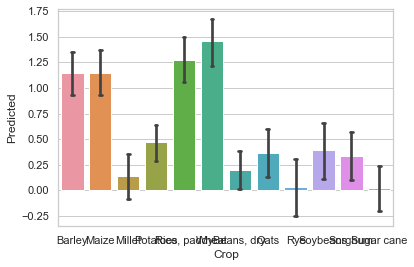

In [376]:
sns.set(style="whitegrid")

ax = sns.barplot(x="Crop", y="Predicted", data=profile,capsize=.1,)

In [399]:
# manoj=pd.DataFrame(profile['Predicted'])
manoj['Total emission']=profile['Total emission']

In [400]:
manoj

,Predicted,Total emission
56,1.595836,0.915975
113,1.372678,1.335315
170,-0.194018,-0.217312
227,1.217364,0.854986
284,1.714471,1.516342
...,...,...
66344,-0.455986,-0.469672
66401,0.586224,0.470660
66458,1.139008,1.156167
66526,0.327440,0.344589


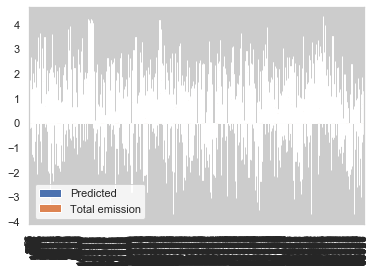

In [401]:
manoj.plot(kind='bar')
plt.show()

Text(0.5, 0, 'Total emission')

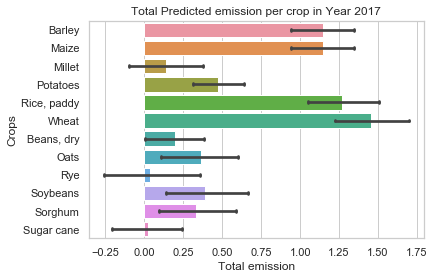

In [427]:
sns.set(style="whitegrid")

ax = sns.barplot(x="Predicted", y="Crop", data=profile,capsize=.1)
plt.title('Total Predicted emission per crop in Year 2017')
plt.ylabel('Crops')
plt.xlabel('Total emission')

In [429]:
profile.loc[(profile['Country']=='India')&(profile['Crop']=='Rice, paddy')]

,Country,Crop,Year,Yield,Annual Population,Total emission,Ctry,Crp,Predicted
26293,India,"Rice, paddy",2017,4.585224,6.126676,4.166329,India,"Rice, paddy",3.081083


In [441]:
data.loc[(data['Country']=='India')&(data['Crop']=='Rice, paddy')]

,Country,Crop,Year,Area harvested,Production quantity,Yield,Annual Population,Total emission
26237,India,"Rice, paddy",1961,34694000.0,53494496.0,15419.0,459642.165,7922.8648
26238,India,"Rice, paddy",1962,35695008.0,49825552.0,13959.0,469077.190,7910.5758
26239,India,"Rice, paddy",1963,35809008.0,55497008.0,15498.0,478825.608,8190.5843
26240,India,"Rice, paddy",1964,36462000.0,58962000.0,16171.0,488848.135,8453.3040
26241,India,"Rice, paddy",1965,35470000.0,45883504.0,12936.0,499123.324,7693.0492
26242,India,"Rice, paddy",1966,35251008.0,45657008.0,12952.0,509631.500,7648.1767
26243,India,"Rice, paddy",1967,36437408.0,56418304.0,15484.0,520400.576,8331.8871
26244,India,"Rice, paddy",1968,36966304.0,59641808.0,16134.0,531513.824,8563.9504
26245,India,"Rice, paddy",1969,37680304.0,60644544.0,16094.0,543084.336,8722.4653
26246,India,"Rice, paddy",1970,37591696.0,63337808.0,16849.0,555189.792,8833.0096


Text(0.5, 0, 'Total emission')

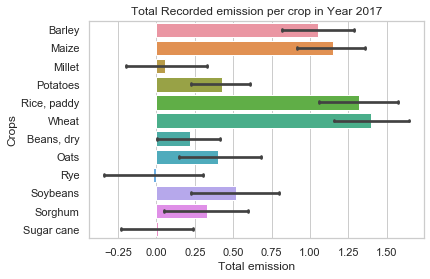

In [428]:
sns.set(style="whitegrid")

ax = sns.barplot(x="Total emission", y="Crop", data=profile,capsize=.1,)
plt.title('Total Recorded emission per crop in Year 2017')
plt.ylabel('Crops')
plt.xlabel('Total emission')

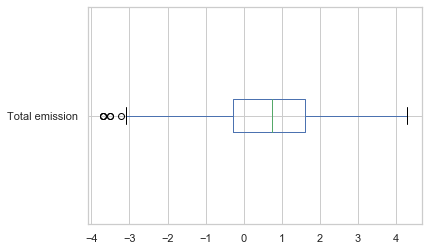

In [421]:
profile.boxplot(column='Total emission',vert=False)
plt.show()

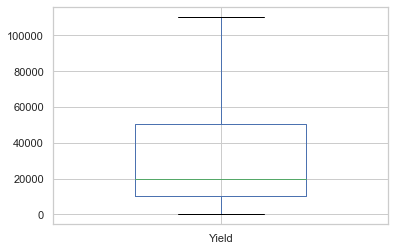

In [420]:
data.boxplot(column='Yield',showfliers=False, widths=(.51))

In [404]:
#profile.to_csv (r'/Users/nishachauhan/Documents/Master/THESIS/2.Dataset/profile.csv', index = False, header=True)